<a href="https://colab.research.google.com/github/cfr3yt/cfr3yt.github.io/blob/main/Week_10-2/SVM_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

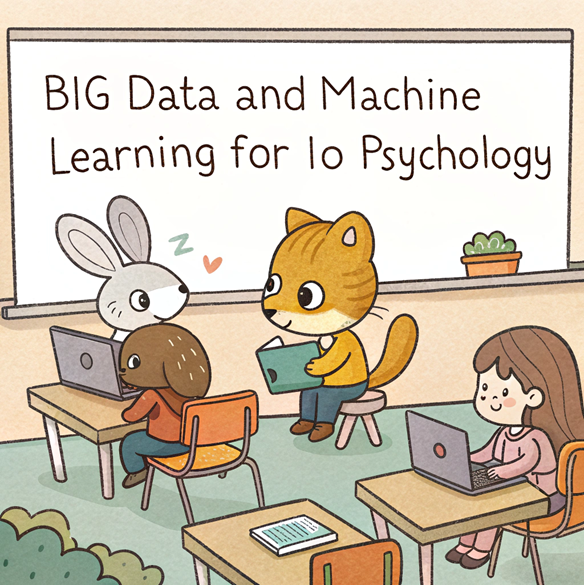

Dr. Philseok Lee @ George Mason University, IO Psy Program

# **Support Vector Machine Classifier**

A **support vector machine (SVM)** is a supervised machine learning algorithm used primarily for classification tasks, though it can also be applied to regression. Its main idea is to **find the optimal hyperplane that separates classes in the feature space with the maximum margin**.

Your organization has conducted a series of voluntary workplace safety training programs and collected feedback from 4,120 employees who participated. **The goal is to assess and improve the training experience for future employees.**

As part of this initiative, **your organization wants to develop a machine learning classifier to predict whether a participant would recommend the training program to others.**

**Through this analysis, let's say that your organization wants to get some important organizational implications:**

**1. Improved Program Design:**

  *   Insights from the model can identify which aspects of training (e.g., clarity, engagement, instructor quality) most influence employee satisfaction. This helps tailor future programs to maximize impact and recommendation.


**2. Strategic Resource Allocation:**
  * If fac (instructors) has a high predictive value, the organization may prioritize hiring or training better instructors, recognizing their influence on overall program success.

**3. Employee Engagement & Trust:**
  * Leveraging feedback in a data-driven way shows employees that their voices matter.

**4. Scalability of Training:**
  * With a model that can predict positive recommendations, the company can roll out similar programs more confidently across other departments or regions.

**5. Culture of Continuous Improvement:**
  * Using models like this can instill a feedback-driven culture, where learning experiences are continuously refined based on measurable outcomes.

**The dataset contains the following variables:**

**1.	rec:** A binary value indicating whether the participant would recommend the training program to others, No = 0, Yes = 1.

**2.	rel:** A rating by the participant on the relevance of the program to their work, where 1 is very low and 5 is very high

**3.	fun:** A rating of how enjoyable and fun the program was for the participant, where 1 is very low and 5 is very high

**4.	clar:** A participant rating of the clarity of the content and training in the program, where 1 is very low and 5 is very high

**5.	home:** A participant rating of the quality of the homework or project work in the program, where 1 is very low and 5 is very high

**6.	class:** A participant rating of the quality of the overall session who attended the program, where 1 is very low and 5 is very high

**7.	fac:** A participant rating of the quality of the program’s instructors, where 1 is very low and 5 is very high


# **1. Import Necessary Libraries and Pakages**

In [1]:
# For data preprocessing
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# For Machine Learning and Evaluation
import time
from sklearn.svm import SVC #support vector classification --> svr is
from sklearn.model_selection import GridSearchCV, train_test_split #
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, confusion_matrix, classification_report

# For Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# **2. Import Dataset and Rename**

In [ ]:
# Google Mount
from google.colab import drive
drive.mount('/content/drive')

# Construct the full path to your CSV file
file_path = '/content/drive/MyDrive/Psy592_892/LR_SVM/Example.csv'

Mounted at /content/drive


In [ ]:
# Read the CSV file into a pandas DataFrame
data = pd.read_csv(file_path) #no missing data --> outcome variable should be integers (0s and 1s)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4120 entries, 0 to 4119
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   rec     4120 non-null   int64
 1   rel     4120 non-null   int64
 2   fun     4120 non-null   int64
 3   clar    4120 non-null   int64
 4   home    4120 non-null   int64
 5   class   4120 non-null   int64
 6   fac     4120 non-null   int64
dtypes: int64(7)
memory usage: 225.4 KB
None


In [ ]:
# Rename variables
data.rename(columns={
    'rec': 'recommendation',
    'rel': 'relevance',
    'fun': 'fun_enjoyable',
    'clar': 'clarity',
    'home': 'homework_quality',
    'class': 'class_quality',
    'fac': 'instructors_quality'
}, inplace=True)

# **3. Exploratory Data Analysis (EDA)**

In [ ]:
# Exploratory Data Analysis (EDA)
print(data.describe())

       recommendation    relevance  fun_enjoyable      clarity  \
count     4120.000000  4120.000000    4120.000000  4120.000000   
mean         0.426214     3.456553       3.846117     3.540291   
std          0.494586     0.815637       0.777262     0.834337   
min          0.000000     1.000000       1.000000     1.000000   
25%          0.000000     3.000000       3.000000     3.000000   
50%          0.000000     3.000000       4.000000     4.000000   
75%          1.000000     4.000000       4.000000     4.000000   
max          1.000000     5.000000       5.000000     5.000000   

       homework_quality  class_quality  instructors_quality  
count       4120.000000    4120.000000          4120.000000  
mean           3.691990       3.143447             3.038107  
std            0.797565       0.888029             0.904390  
min            1.000000       1.000000             1.000000  
25%            3.000000       3.000000             3.000000  
50%            4.000000       3.0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4120 entries, 0 to 4119
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   recommendation       4120 non-null   int64
 1   relevance            4120 non-null   int64
 2   fun_enjoyable        4120 non-null   int64
 3   clarity              4120 non-null   int64
 4   homework_quality     4120 non-null   int64
 5   class_quality        4120 non-null   int64
 6   instructors_quality  4120 non-null   int64
dtypes: int64(7)
memory usage: 225.4 KB


In [ ]:
# Function to plot bar graphs with counts (prefixed with "n=") and percentages inside bars
def plot_bar_graph(data, columns):
    """
    Plot bar graph for each numeric feature, showing frequency (with 'n=') and percentage inside bars.
    """
    for col in columns:
        plt.figure(figsize=(10, 6))
        ax = sns.countplot(x=data[col], color='#E15759', alpha=0.6) # do this to check frequnecies and normality
        total = len(data[col])
        for p in ax.patches:
            height = p.get_height()
            percentage = (height / total) * 100
            ax.text(
                p.get_x() + p.get_width() / 2,
                height / 2,
                f'n={int(height)}\n({percentage:.1f}%)',
                ha='center', va='center', fontsize=10, color='black'
            )
        plt.title(f'Bar Graph for {col}', fontsize=12)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.show()

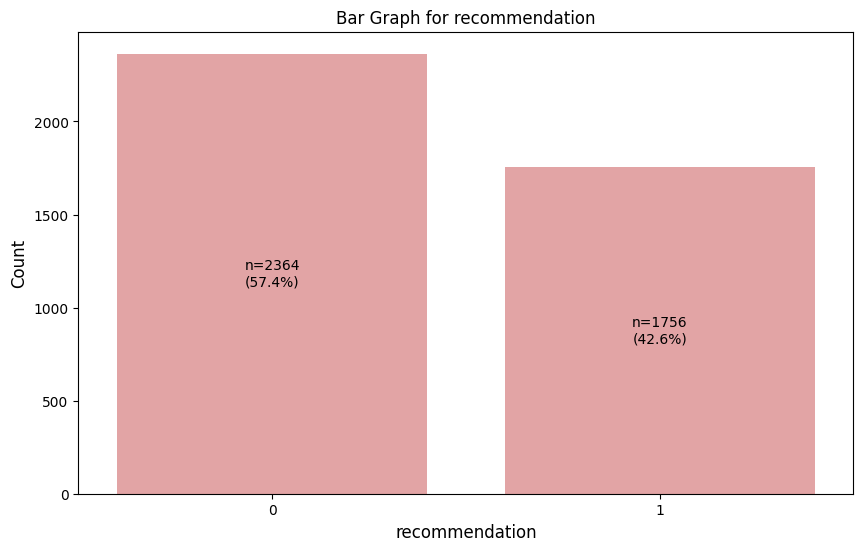

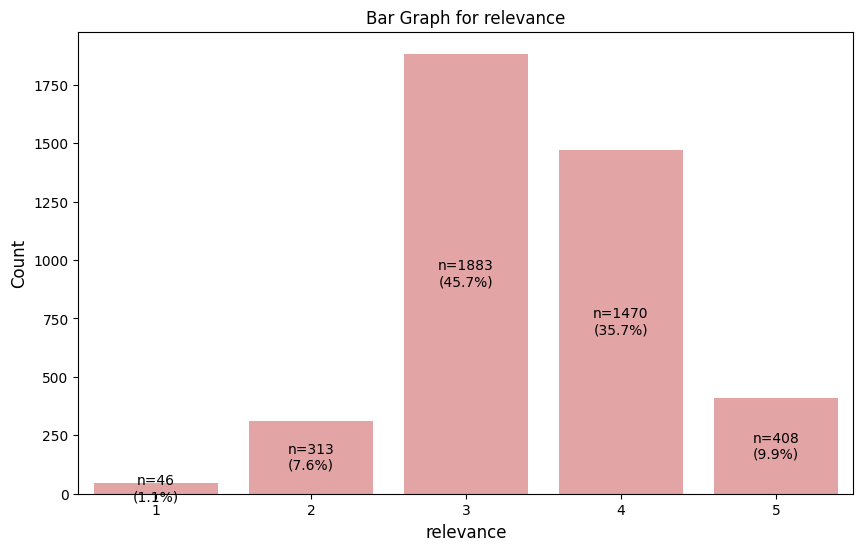

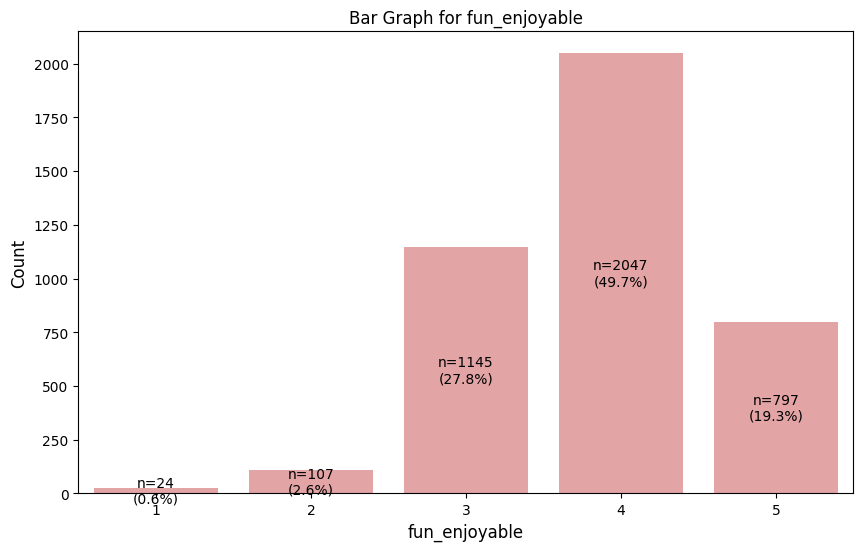

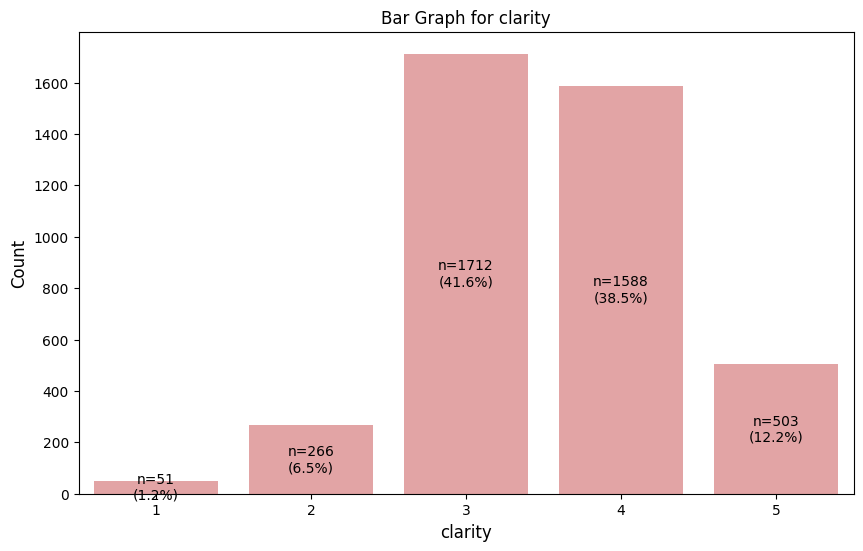

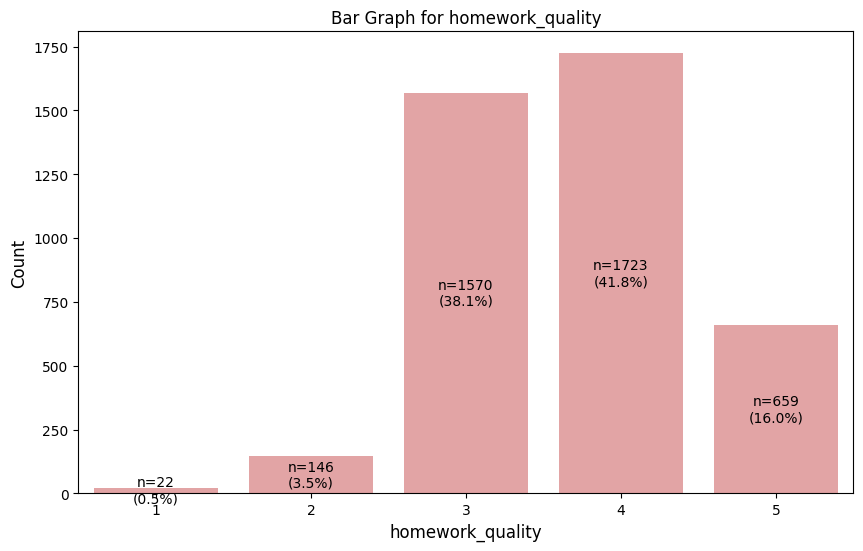

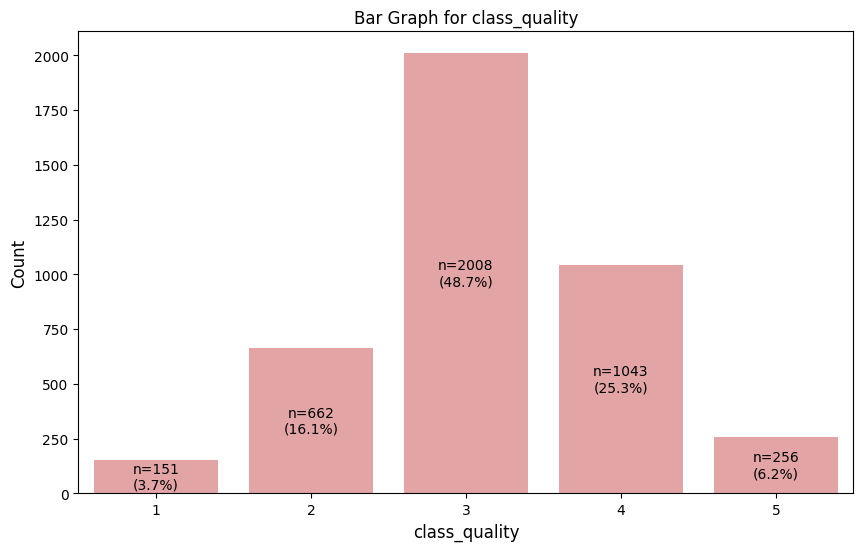

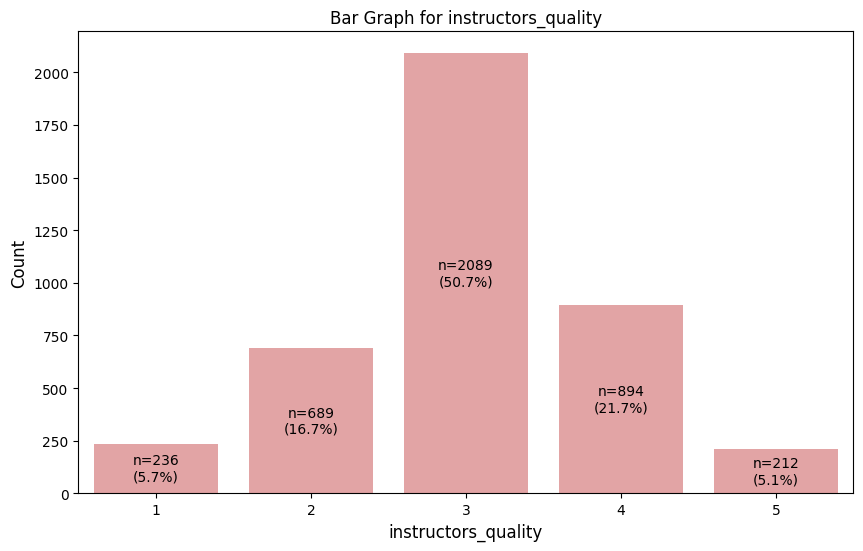

In [ ]:
column_names = data.columns.tolist()
plot_bar_graph(data, column_names)
plt.show()

# **4. Data Preprocessing: Data Partition and Scaling**

In [ ]:
# Data partition: Training set and Test set
X = data.drop('recommendation', axis=1) # feature groups are dropped
y = data['recommendation'] # this is the outcome

X_train, X_test, y_train, y_test = train_test_split(
    X, # feature
    y, # outcome
    test_size=0.3, #30% of data will be used a testing set
    stratify=y,
    random_state=123
)

In [ ]:
# Data Scaling (important for SVM) --> SVM uses distance --> large numbers give a computational burden so normalizing is a good practice to make the model to make it easier to prcocess
scaler = StandardScaler() # StandardScaler from scikit-learn computes the mean and standard deviation of each feature in the data.
X_train_scaled = scaler.fit_transform(X_train) #fit_transform method standardize the data
X_test_scaled = scaler.transform(X_test) # The test set is transformed using the same mean and standard deviation computed from the training set. This is important to ensure that the test data is scaled in the same way.

# **5. Model Building with GridSearchCV**

Determine the optimal hyper-parameters

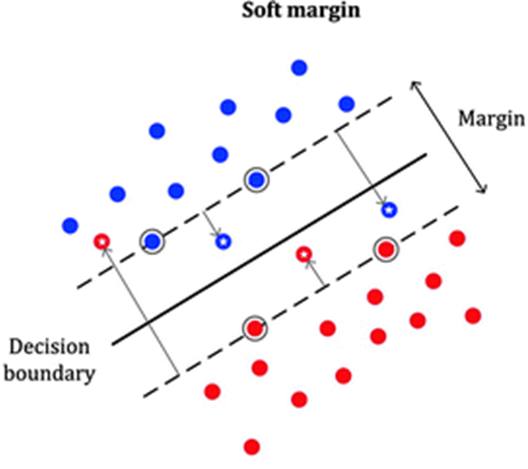

**soft margin linear SVM**

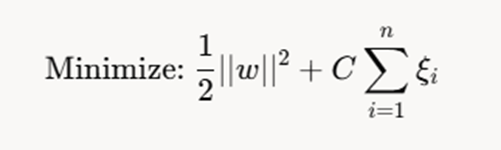

* **Large C**: Do not allow training error --> Small margin --> Overfitting

* **Small C**: Allow training error --> Large margin --> Underfitting


**Polynomial kernel hyperparameter**
* The degree hyperparameter, which controls how “bendy” the decision boundary will be for the polynomial kernel.
* **The higher the degree of the polynomial, the more bendy and complex a decision boundary can be learned,** but this has the potential to overfit the training set.


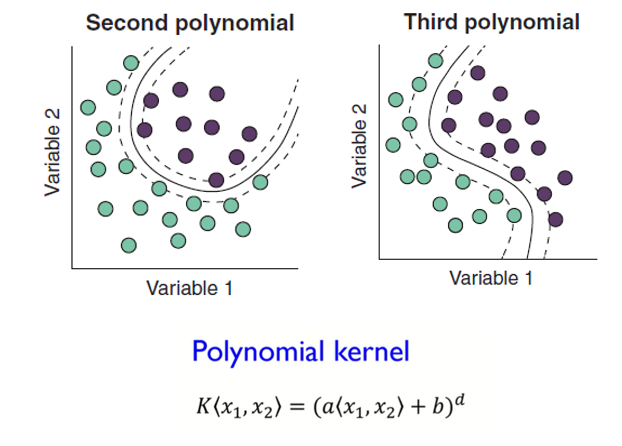

**Gaussian radial basis kernel SVM**

* The **gamma hyperparameter** controls the influence that each case has on the position of the hyperplane and is used by all the kernel functions.
* **The larger gamma is, the more attention-seeking each case is**, and the more granular the decision boundary will be (potentially leading to overfitting).
* **The smaller gamma is, the less attention-seeking each case will be**, and the less granular the decision boundary will be (potentially leading to underfitting).

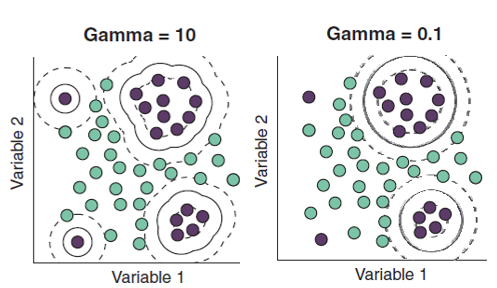

🔶Note: **SVC** is for Support Vector Machine **Classficiation model**, **SVR** is for Support Vector Machine for **Regression model**.

In [ ]:
svc = SVC(random_state=2021, probability=True)
param_grid = [{'kernel': ['linear'], 'C': [0.1, 0.5, 1, 10]}, # we can try more combinations we can add more but remember svm is computationally heavy and will take longer
              {'kernel': ['poly'], 'degree':[2, 3],'C': [0.1, 1, 10]},#
              {'kernel': ['rbf'], 'gamma': ['auto'],'C': [0.1, 0.5, 1, 10]}] #radial basis kernel , there are two different ways to compute gamme , auto or scale ,
# gamma = auto: This means it only considers the number of features in your dataset.

* **probability=True:** Enables probability estimates. This means after training, you can use predict_proba to obtain probabilities for each class.
* **C: Tests multiple values (0.1, 0.5, 1, and 10) for the regularization parameter C,** which controls the trade-off between achieving a low error on the training data and maintaining a large margin.
* **gamma: Is set to 'auto'**, meaning the value is computed as 1 divided by the number of features.

In [ ]:
#If you want to add more parameters, you can try below
#param_grid = [{'kernel': ['linear'], 'C': [0.1, 1, 10, 100, 1000]},
#              {'kernel': ['poly'], 'degree':[2, 3, 5],'C': [0.1, 1, 10, 100, 1000]},
#              {'kernel': ['rbf'], 'gamma': ['auto', 'scale'],'C': [0.1, 1, 10, 100, 1000]}]  # in this example it scales the number but if you already scaled the features that indicates that there is no difference but if you did not scale before runniing than auto will take longer but the results will be the same

In [ ]:
# Define the scoring metric.
CV_svc = GridSearchCV(
    estimator=svc,  # Uses the previously defined SVM classifier (svc)
    param_grid=param_grid, #Provides a dictionary (or list of dictionaries) of hyperparameter values to try.
    scoring= 'roc_auc', #Sets the performance metric to the ROC AUC
    cv=5, #Uses 5-fold cross-validation to evaluate each hyperparameter combination.
    verbose=1,      # Enables progress messages during the grid search, so you can monitor the process.
    n_jobs=-1       # Runs the grid search in parallel using all available CPU cores, which speeds up the computation.Recommended to reduce computational processing time
)

In [ ]:
# Run grid search using the training data

start_time = time.time() # Start timing execution

CV_svc.fit(X_train_scaled, y_train) #Runs the grid search

end_time = time.time()
print(f"\nTime taken: {end_time - start_time:.2f} seconds")

Fitting 5 folds for each of 14 candidates, totalling 70 fits

Time taken: 62.31 seconds


In [ ]:
#This attribute is a dictionary containing detailed information about each run during the grid search.
CV_svc.cv_results_

df = pd.DataFrame(CV_svc.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_degree,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.730876,0.038894,0.029773,0.003741,0.1,linear,NaN,NaN,"{'C': 0.1, 'kernel': 'linear'}",0.816066,0.818492,0.799855,0.821120,0.819508,0.815008,0.007752,1
1,0.894003,0.027714,0.029080,0.001032,0.5,linear,NaN,NaN,"{'C': 0.5, 'kernel': 'linear'}",0.816042,0.817669,0.800248,0.820653,0.819705,0.814863,0.007481,2
2,1.437848,0.343569,0.039359,0.009718,1.0,linear,NaN,NaN,"{'C': 1, 'kernel': 'linear'}",0.815919,0.817276,0.799818,0.820899,0.819742,0.814731,0.007661,4
3,3.165969,0.466425,0.029317,0.000706,10.0,linear,NaN,NaN,"{'C': 10, 'kernel': 'linear'}",0.815882,0.817558,0.800027,0.820788,0.819718,0.814795,0.007577,3
4,1.043001,0.033904,0.044335,0.001118,0.1,poly,2.0,NaN,"{'C': 0.1, 'degree': 2, 'kernel': 'poly'}",0.500319,0.535621,0.551372,0.514080,0.484863,0.517251,0.023864,14
5,1.239857,0.300235,0.057550,0.017946,0.1,poly,3.0,NaN,"{'C': 0.1, 'degree': 3, 'kernel': 'poly'}",0.799634,0.787715,0.784762,0.811381,0.793970,0.795492,0.009461,8
6,1.459267,0.351239,0.057615,0.013597,1.0,poly,2.0,NaN,"{'C': 1, 'degree': 2, 'kernel': 'poly'}",0.529413,0.563020,0.568541,0.521105,0.568901,0.550196,0.020635,12
7,1.154727,0.017809,0.035726,0.001451,1.0,poly,3.0,NaN,"{'C': 1, 'degree': 3, 'kernel': 'poly'}",0.793248,0.775839,0.777258,0.803300,0.790628,0.788055,0.010313,10
8,1.699113,0.133163,0.045910,0.001506,10.0,poly,2.0,NaN,"{'C': 10, 'degree': 2, 'kernel': 'poly'}",0.525704,0.555738,0.569671,0.508738,0.488168,0.529604,0.029852,13
9,4.151224,0.663545,0.040121,0.011073,10.0,poly,3.0,NaN,"{'C': 10, 'degree': 3, 'kernel': 'poly'}",0.780205,0.771823,0.774077,0.797172,0.788914,0.782438,0.009451,11


In [ ]:
df[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,0.1,linear,0.815008
1,0.5,linear,0.814863
2,1.0,linear,0.814731
3,10.0,linear,0.814795
4,0.1,poly,0.517251
5,0.1,poly,0.795492
6,1.0,poly,0.550196
7,1.0,poly,0.788055
8,10.0,poly,0.529604
9,10.0,poly,0.782438


In [ ]:
# In the context of GridSearchCV, CV_svc.best_score_ gives you
# the highest average cross-validation score achieved by the
# best combination of hyperparameters tested.
CV_svc.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [ ]:
# In the context of GridSearchCV, CV_svc.best_score_ gives
# you the highest average cross-validation score achieved
# by the best combination of hyperparameters tested.
CV_svc.best_score_

np.float64(0.8150081230635354)

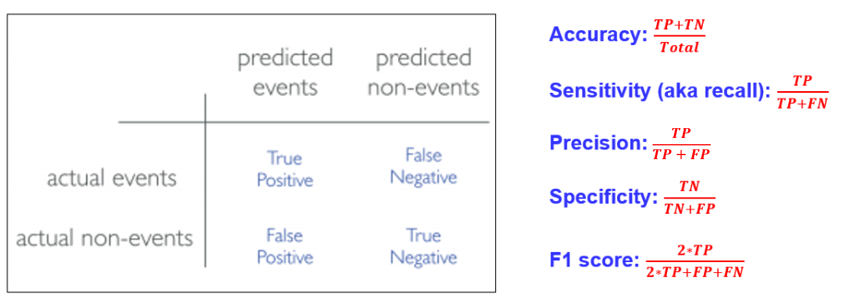

🌻💮🥀 **Evaluation Metrics**
* **Accuracy:** Overall, how often is the classifier correct? (Measures overall correctness)
* **Sensitivity (aka recall):** How accurately does the classifier classify actual events? (Measures the proportion of actual positives correctly identified)
* **Precision:** When the classifier says 'yes,' how often is it right? (The proportion of positive predictions that are actually correct)
* **Specificity:** How accurately does the classifier classify actual non-events? (Measures the proportion of actual negatives correctly identified)
* **F1 score:** Harmonic mean of precision and recall

In [ ]:
# Evaluate the training model # interpretation -- >look at the f1 score --> results are consistent with logistic regression results because they are linear
y_train_pred = CV_svc.predict(X_train_scaled)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1655
           1       0.71      0.67      0.69      1229

    accuracy                           0.74      2884
   macro avg       0.74      0.73      0.74      2884
weighted avg       0.74      0.74      0.74      2884



* **Precision:** For each class, precision is the **proportion of correct positive predictions**.

  * Class 0 Precision (0.77): Out of all predictions where the model labeled an employee as "don’t recommend" (class 0), 77% were actually employees who didn’t recommend the training.

  * Class 1 Precision (0.71): Out of all predictions where the model labeled an employee as "recommend" (class 1), 71% were actually employees who recommended the training..

* **Recall:** Also known as **sensitivity**, recall is the **proportion of actual positives that were correctly identified**.

  * Class 0 Recall (0.79): Of all employees who actually didn’t recommend the training (1655 samples), 81% were correctly predicted as "don’t recommend.".

  * Class 1 Recall (0.67): Of all employees who actually recommended the training (1229 samples), 67% were correctly predicted as "recommend.".

* **F1-Score**: This is the **harmonic mean of precision and recall, providing a single measure that balances both**.

  * Class 0 F1-Score (0.78): For non-recommenders, the model achieves a good balance between prediction accuracy (precision) and coverage of actual cases (recall). A score of 0.78 is solid, indicating reliable performance for class 0.

  * Class 1 F1-Score (0.69): For recommenders, the balance is relatively weaker due to lower recall. The model struggles more to both identify all recommenders and ensure its "recommend" predictions are correct, reflected in the lower F1 score.

* **Overall Accuracy (0.74)**: Overall, 74% accuracy is decent, but it’s influenced by the class imbalance (1655 non-recommenders vs. 1229 recommenders). The model performs better at identifying non-recommenders (higher recall and F1), which may boost accuracy since class 0 has more samples.

* **Support (1655)**: There are 1655 samples of class 0 in the test set.
* **Support (1229)**: There are 1229 samples of class 1 in the test set.

* **Macro Average (Precision: 0.74, Recall: 0.73, F1: 0.74)**: The model’s average performance is balanced but slightly favors class 0 (non-recommenders) due to higher recall and F1 scores there.

* **Weighted Average (Precision: 0.74, Recall: 0.74, F1: 0.74)**: Average weighted by support (number of samples per class). Reflects overall performance adjusted for class sizes.

🔥🔥🔥 **Contextual Insights**

* **The model is good at identifying employees who don’t recommend the training (recall 0.79, precision 0.77, F1 0.78). This could be valuable if the goal is to flag dissatisfaction for follow-up (e.g., improving the program).**
* Overall accuracy (74%) suggests the model is reasonably effective across both classes.
* The model struggles more with recommenders (class 1):
Lower recall (0.67) means it misses 33% of employees who actually recommend the training.
* Precision (0.71) indicates 29% of "recommend" predictions are wrong.
F1 (0.69) is noticeably lower than for class 0, showing an imbalance in performance.
* This suggests the model might underpredict recommendations, potentially due to feature limitations or class imbalance.

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_train, y_train_pred)

# Extract TN, FP, FN, TP from confusion matrix
# For binary classification: cm = [[TN, FP], [FN, TP]]
TN, FP = cm[0, 0], cm[0, 1]  # Row 0: Actual negatives (class 0)
FN, TP = cm[1, 0], cm[1, 1]  # Row 1: Actual positives (class 1)

# Calculate specificity for class 0 (negative class)
specificity_0 = TN / (TN + FP) if (TN + FP) > 0 else 0
print(f"\nSpecificity for Class 0 (Non-recommendation): {specificity_0:.4f}")

# Calculate specificity for class 1 (positive class, if interpreted as negative in a flipped context)
specificity_1 = TP / (TP + FN) if (TP + FN) > 0 else 0
print(f"Specificity for Class 1 (Recommendation): {specificity_1:.4f}")


Specificity for Class 0 (Non-recommendation): 0.7940
Specificity for Class 1 (Recommendation): 0.6737


* **Specificity for Class 0:** The model is moderate at identifying employees who don’t recommend the training, missing about 21% of them (false positives, predicted as "recommend").

* **Specificity for Class 1:** It shows the model correctly identifies about 67% of recommenders, missing about 33% (false negatives, predicted as "don’t recommend").

# **6. Evaluate predictions on test set**

In [ ]:
# Evaluate the best model on the test set
y_test_pred = CV_svc.predict(X_test_scaled)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       709
           1       0.67      0.65      0.66       527

    accuracy                           0.72      1236
   macro avg       0.71      0.71      0.71      1236
weighted avg       0.71      0.72      0.72      1236



**Training Results:**

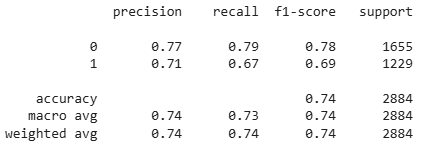

🔶 **Note**: The test results are approximately comparable to those of the training set. We conclude that our training model is appropriately fitted.

In [ ]:
# "model.predict_proba" computes the predicted probabilities for each sample in the scaled test dataset.

#np.set_printoptions(threshold=np.inf) # print entire result.
print(model.predict_proba(X_test_scaled))

# **7. ROC and AUC**

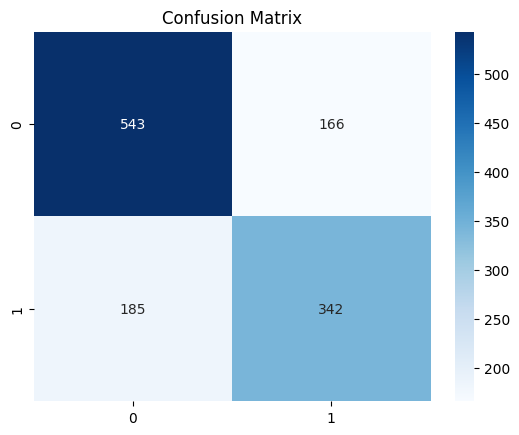

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix")
plt.show()

In [ ]:
# ROC and AUC
y_train_prob = CV_svc.predict_proba(X_train_scaled)[:, 1] # Get predicted probabilities for the positive class for the training set
roc_auc_train = roc_auc_score(y_train, y_train_prob) # Calculate the ROC AUC score for the training set

y_test_prob = CV_svc.predict_proba(X_test_scaled)[:, 1] # Get predicted probabilities for the positive class for the test set
roc_auc_test = roc_auc_score(y_test, y_test_prob) # Calculate the ROC AUC score for the test set

* **False Positive Rate (fpr)**: The proportion of negative samples that are incorrectly classified as positive at various threshold settings.

* **True Positive Rate (tpr)**: The proportion of actual positive samples that are correctly classified as positive.

* **Thresholds**: The different cut-off points used to determine the classification, which lead to different pairs of (fpr, tpr) values.

* **AUC**: This single metric summarizes the ROC curve. It represents the likelihood that the model ranks a randomly chosen positive instance higher than a randomly chosen negative one.

* **A value of 1.0** represents perfect discrimination, whereas **0.5** indicates no discrimination (random guessing).

In [ ]:
# Compute false positive rate and true positive rate
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob) # Compute the ROC curve for the training set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob) # Compute the ROC curve for the test set

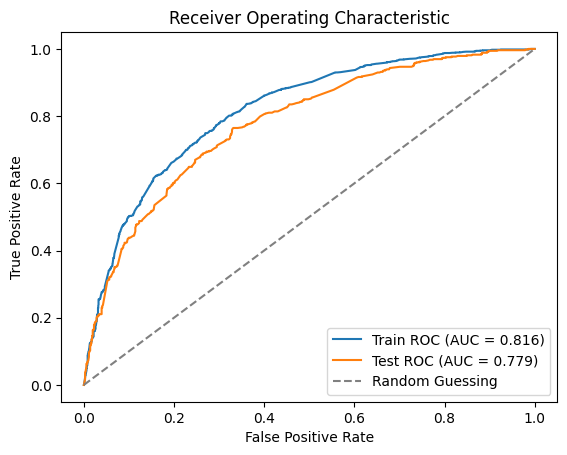

In [ ]:
# Plot the ROC curves for both training and test sets on the same plot # train result is usually better because it is based on the set that the model used
plt.figure()
plt.plot(fpr_train, tpr_train, label=f"Train ROC (AUC = {roc_auc_train:.3f})")
plt.plot(fpr_test, tpr_test, label=f"Test ROC (AUC = {roc_auc_test:.3f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

# **8. Feature Importance**

**Feature Importance:**

* **Linear SVM:** If the best model is linear (i.e., it has a coef_ attribute), the code extracts the **coefficients** and displays them as feature importances.

* **Non-linear SVM:** If the model is non-linear (e.g., RBF), **permutation importance** is computed using permutation_importance from scikit-learn. This method shuffles each feature to estimate its importance based on the change in the scoring metric (ROC AUC in this case).

In [ ]:
column_names

['recommendation',
 'relevance',
 'fun_enjoyable',
 'clarity',
 'homework_quality',
 'class_quality',
 'instructors_quality']

In [ ]:
# SVM model parameters
best_model = CV_svc.best_estimator_
best_model.coef_[0]

array([ 8.54532680e-01,  5.60161329e-05,  2.68841242e-01, -6.39867227e-02,
        4.30924382e-01,  2.17849696e-01])


Feature Importances based on Coefficients (Linear SVM):
               feature  importance
0            relevance    0.854533
4        class_quality    0.430924
2              clarity    0.268841
5  instructors_quality    0.217850
3     homework_quality   -0.063987
1        fun_enjoyable    0.000056


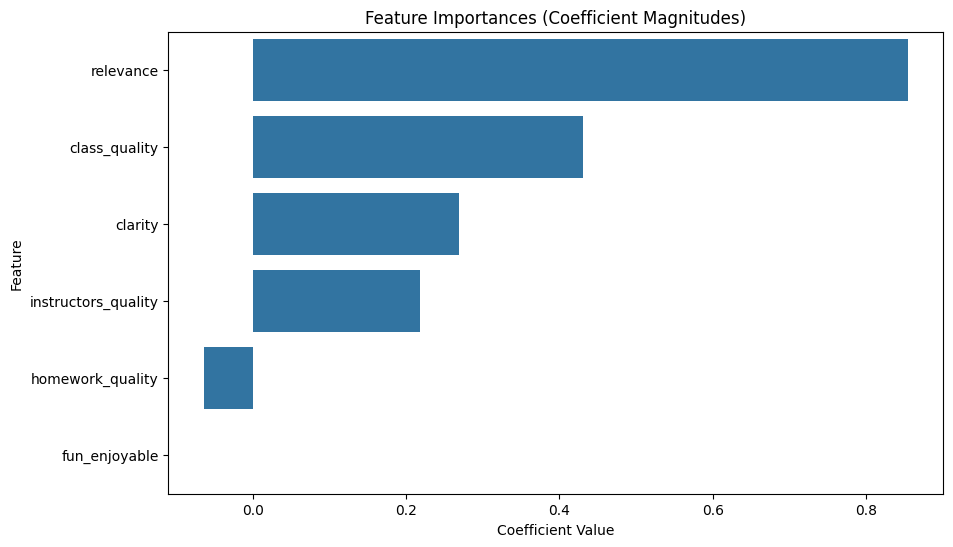

In [ ]:
# --- Feature Importance Evaluation ---

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance

def plot_importance(df, title, xlabel, ylabel):
    """Plot feature importances using a bar plot."""
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=df)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Get the best estimator from grid search
best_estimator = CV_svc.best_estimator_

if hasattr(best_estimator, "coef_"):
    # Linear SVM: use coefficients for feature importance.
    # For multiclass problems, coef_ is an array with shape (n_classes, n_features).
    # Here we assume binary classification or use coefficients from the first class.
    importances = best_estimator.coef_[0]
    feat_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': importances
    })
    # Create a column for the absolute importance to sort features
    feat_importance['abs_importance'] = feat_importance['importance'].abs()
    feat_importance.sort_values(by='abs_importance', ascending=False, inplace=True)

    print("\nFeature Importances based on Coefficients (Linear SVM):")
    print(feat_importance[['feature', 'importance']])

    plot_importance(
        feat_importance,
        "Feature Importances (Coefficient Magnitudes)",
        "Coefficient Value",
        "Feature"
    )
else:
    # Non-linear SVM: use permutation importance.
    result = permutation_importance(
        best_estimator, X_test_scaled, y_test,
        scoring='roc_auc', n_repeats=10, random_state=123, n_jobs=-1
    )
    perm_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': result.importances_mean
    })
    perm_importance.sort_values(by='importance', ascending=False, inplace=True)

    print("\nFeature Importances based on Permutation Importance:")
    print(perm_importance)

    plot_importance(
        perm_importance,
        "Feature Importances (Permutation Importance)",
        "Mean Importance",
        "Feature"
    )


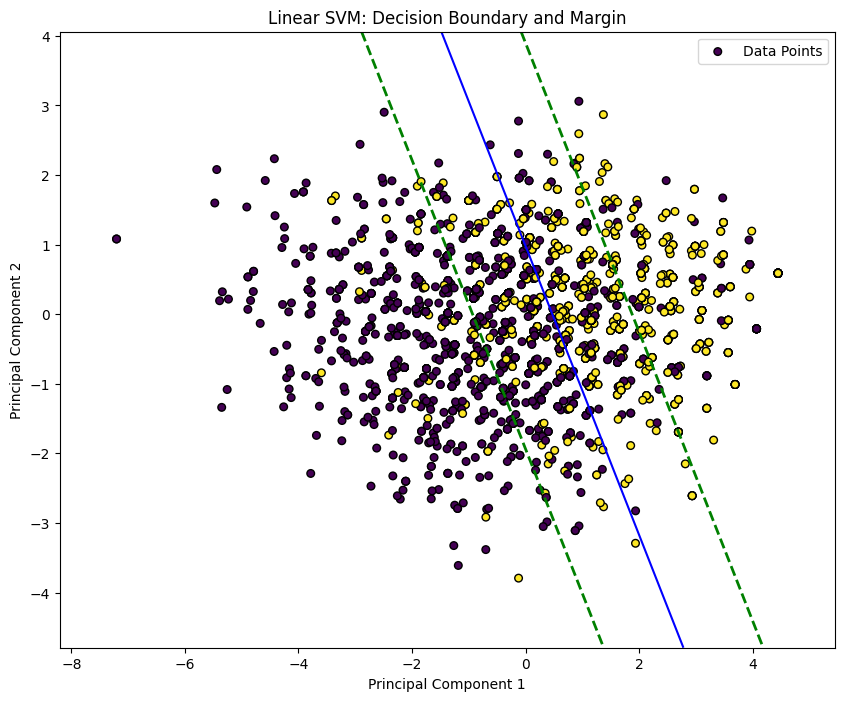

In [ ]:
###############################################################
### This is optional only for class demonstration purpose #####
###############################################################

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA

# Reduce dimensionality to 2D for visualization ---
pca_vis = PCA(n_components=2)
X_train_pca_vis = pca_vis.fit_transform(X_train_scaled)
X_test_pca_vis = pca_vis.transform(X_test_scaled)

# Train a Linear SVM on the PCA data ---
svm_vis = SVC(kernel='linear', C=1, random_state=2021)
svm_vis.fit(X_train_pca_vis, y_train)

# Extract parameters for decision boundary ---
w = svm_vis.coef_[0]  # Coefficients for the decision function
b = svm_vis.intercept_[0]  # Intercept

# Create a mesh grid in the PCA space ---
x_min, x_max = X_train_pca_vis[:, 0].min() - 1, X_train_pca_vis[:, 0].max() + 1
y_min, y_max = X_train_pca_vis[:, 1].min() - 1, X_train_pca_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Compute decision function values over the grid
Z = (w[0] * xx + w[1] * yy + b)

# --- Step 5. Plot the decision boundary and margin without support vectors ---
plt.figure(figsize=(10, 8))

# Plot the decision boundary (Z = 0) in blue
plt.contour(xx, yy, Z, levels=[0], colors='blue', linestyles='-')

# Plot the margin lines (Z = -1 and Z = 1) in green (dashed)
plt.contour(xx, yy, Z, levels=[-1, 1], colors='green', linestyles='--', linewidths=2)

# Plot the training data points
plt.scatter(X_train_pca_vis[:, 0], X_train_pca_vis[:, 1], c=y_train, cmap='viridis',
            s=30, edgecolors='k', label='Data Points')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Linear SVM: Decision Boundary and Margin')
plt.legend()
plt.show()
